<a href="https://colab.research.google.com/github/Rwolste/EDA/blob/main/GSS_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
#
var_list = ['relig', 'yearly','wrkslf','partyid','premarsx'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

The varibales I picked were religion, self employed, yearly wage, partyid, and premarital sex. I picked these beacuse I wanted to analyze the effects religion has on these variables.

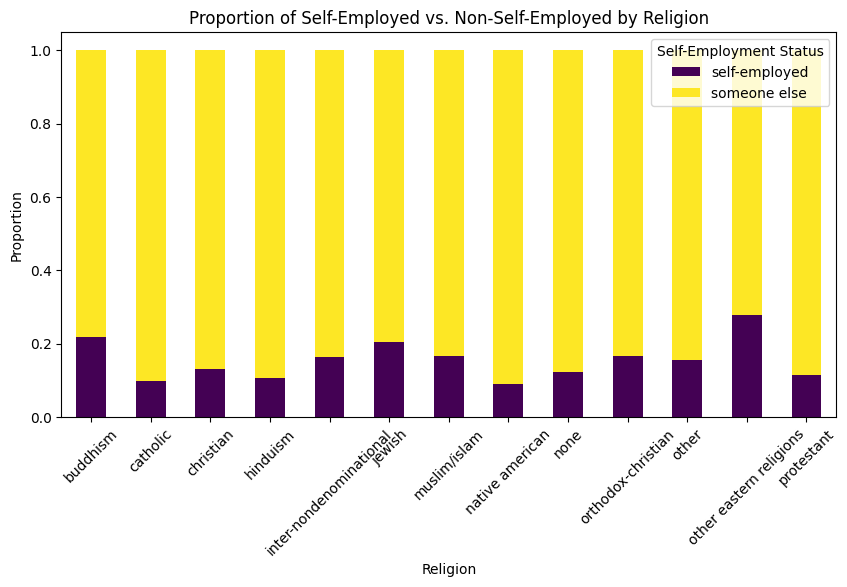

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("selected_gss_data.csv")

# Data Cleaning
df = df.dropna(subset=['relig', 'wrkslf'])  # Drop rows with missing religion or self-employment status

# Standardizing categorical values
df['relig'] = df['relig'].str.strip().str.lower()
df['wrkslf'] = df['wrkslf'].str.strip().str.lower()

# Count occurrences and normalize to get proportions
wrkslf_counts = df.groupby(['relig', 'wrkslf']).size().unstack(fill_value=0)
wrkslf_proportions = wrkslf_counts.div(wrkslf_counts.sum(axis=1), axis=0)  # Normalize by religion

# Plot normalized stacked bar chart
wrkslf_proportions.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')
plt.xlabel("Religion")
plt.ylabel("Proportion")
plt.title("Proportion of Self-Employed vs. Non-Self-Employed by Religion")
plt.xticks(rotation=45)
plt.legend(title="Self-Employment Status")
plt.show()


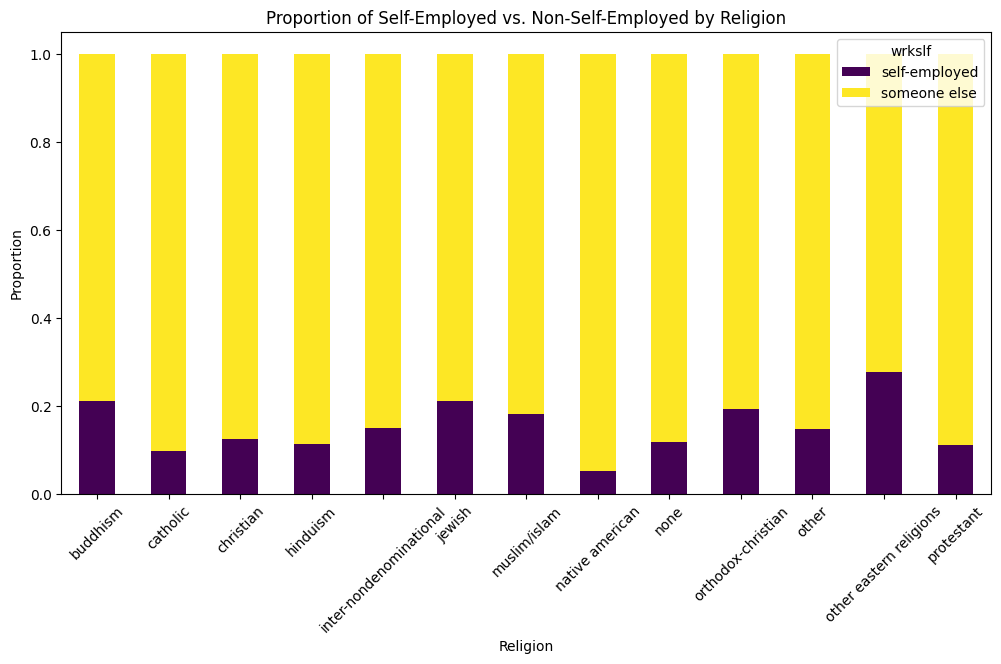

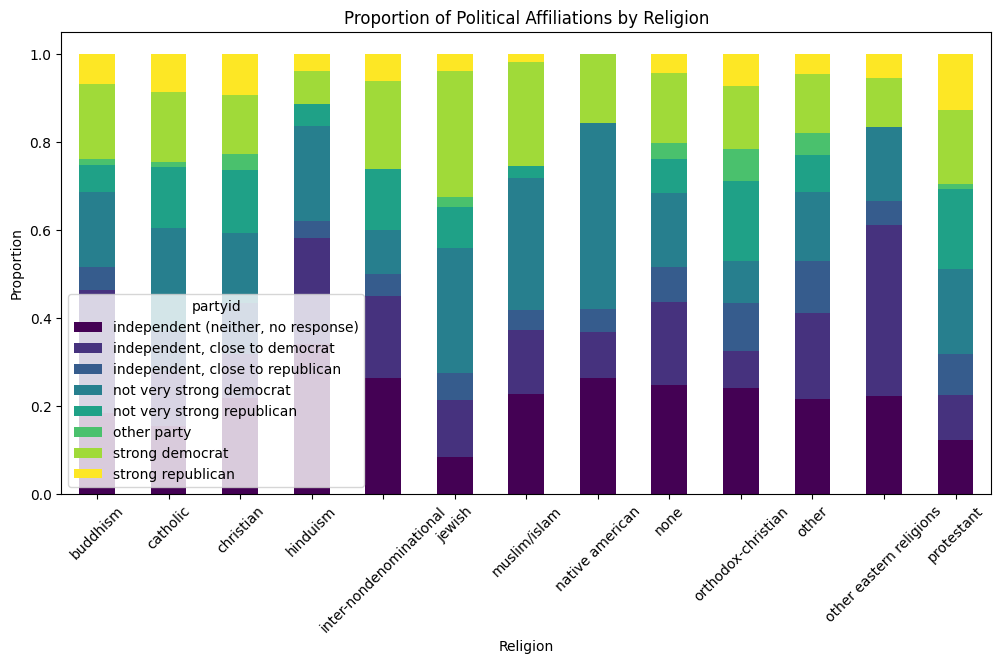

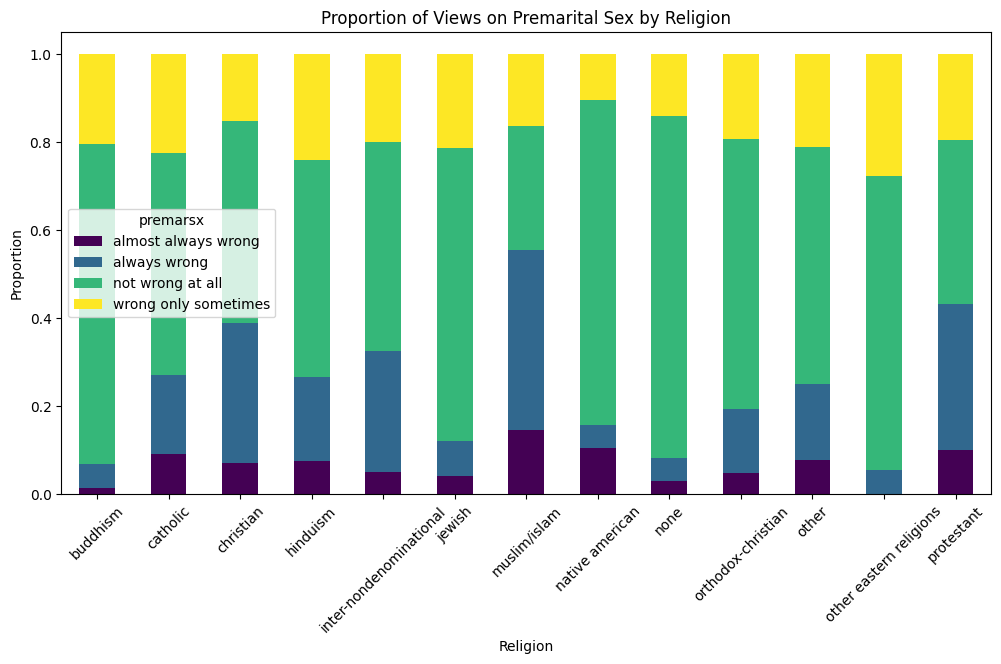

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("selected_gss_data.csv")

# Data Cleaning: Drop rows where key variables are missing
df = df.dropna(subset=['relig', 'wrkslf', 'partyid', 'premarsx'])

# Standardizing categorical values
df['relig'] = df['relig'].str.strip().str.lower()
df['wrkslf'] = df['wrkslf'].str.strip().str.lower()
df['partyid'] = df['partyid'].str.strip().str.lower()
df['premarsx'] = df['premarsx'].str.strip().str.lower()

# Function to plot normalized stacked bar charts
def plot_proportional_stacked_bar(df, category, title):
    counts = df.groupby(['relig', category]).size().unstack(fill_value=0)
    proportions = counts.div(counts.sum(axis=1), axis=0)  # Normalize by religion
    proportions.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
    plt.xlabel("Religion")
    plt.ylabel("Proportion")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(title=category)
    plt.show()

# Plot self-employment proportions
plot_proportional_stacked_bar(df, 'wrkslf', "Proportion of Self-Employed vs. Non-Self-Employed by Religion")

# Plot political affiliation proportions
plot_proportional_stacked_bar(df, 'partyid', "Proportion of Political Affiliations by Religion")

# Plot views on premarital sex proportions
plot_proportional_stacked_bar(df, 'premarsx', "Proportion of Views on Premarital Sex by Religion")


Self-Employment Proportions by Religion:

Jewish respondents had the highest proportion of self-employed individuals compared to other religious groups.
Protestants also had a notable proportion of self-employed individuals, but the majority were still non-self-employed.
Catholics had a lower proportion of self-employed individuals, with the majority working for someone else.
Other religious groups such as Hindus and inter/non-denominational respondents had small sample sizes, making trends less clear.
Conclusion: Jewish and Protestant respondents show a greater tendency toward self-employment, while Catholics and other religious groups are more likely to be traditionally employed.

Political Affiliation Proportions by Religion:

Jewish respondents showed a strong preference for Democratic affiliations, with a high proportion identifying as either Democrats or Independents who lean Democratic.
Catholic respondents were more politically diverse, with relatively balanced representation among Democrats, Republicans, and Independents.
Christian respondents had a higher proportion of Republican and conservative-leaning affiliations.
Hindu and inter/non-denominational respondents had smaller sample sizes, making strong conclusions difficult.
Conclusion: Religion appears to influence political identity, with Jewish respondents favoring Democrats, Christians leaning Republican, and Catholics showing political diversity.

Views on Premarital Sex Proportions by Religion:

Jewish respondents had the highest proportion of individuals who believe premarital sex is "not wrong at all".
Catholic respondents were divided, with some believing it is "always wrong", while a significant portion said it is "not wrong at all" or "wrong only sometimes".
Christian respondents had the highest proportion of individuals who view premarital sex as "always wrong".
Hindu and inter/non-denominational respondents also leaned toward more conservative views, with higher proportions stating that premarital sex is "wrong".
Conclusion: Religious beliefs strongly correlate with views on premarital sex, with Jewish respondents being the most accepting, Christians the most conservative, and Catholics divided.
